Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
sns.set_style("whitegrid")
plt.rc("figure",autolayout=True)
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold",titlesize=18,titlepad=10)
plt.rc("animation",html="html5")
import warnings
warnings.filterwarnings("ignore")

Import Data

In [4]:
train_path=r"D:\Resume Projects\Forecasting Sales\train.csv"
test_path=r"D:\Resume Projects\Forecasting Sales\test.csv"

In [5]:
train_data=pd.read_csv(train_path)
test_data=pd.read_csv(test_path)

In [6]:
train_df=pd.DataFrame(train_data)
test_df=pd.DataFrame(test_data)

In [7]:
train_df.head(3)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0


In [8]:
test_df.head(3)

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       98550 non-null  int64 
 1   date     98550 non-null  object
 2   country  98550 non-null  object
 3   store    98550 non-null  object
 4   product  98550 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
train_df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [12]:
train_df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

Important : Null and 0 are not same in data.   
0 is a value.  
Null means value doesn't exist (data not available).  

In [13]:
test_df.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

Dealing with Date

In [14]:
train_df["date"]=pd.to_datetime(train_df["date"])
test_df["date"]=pd.to_datetime(test_df["date"])

Perform Exploratory Data Analysis

In [15]:
for col in train_df.columns:
    print(col,'---->',train_df[col].nunique())

id ----> 230130
date ----> 2557
country ----> 6
store ----> 3
product ----> 5
num_sold ----> 4037


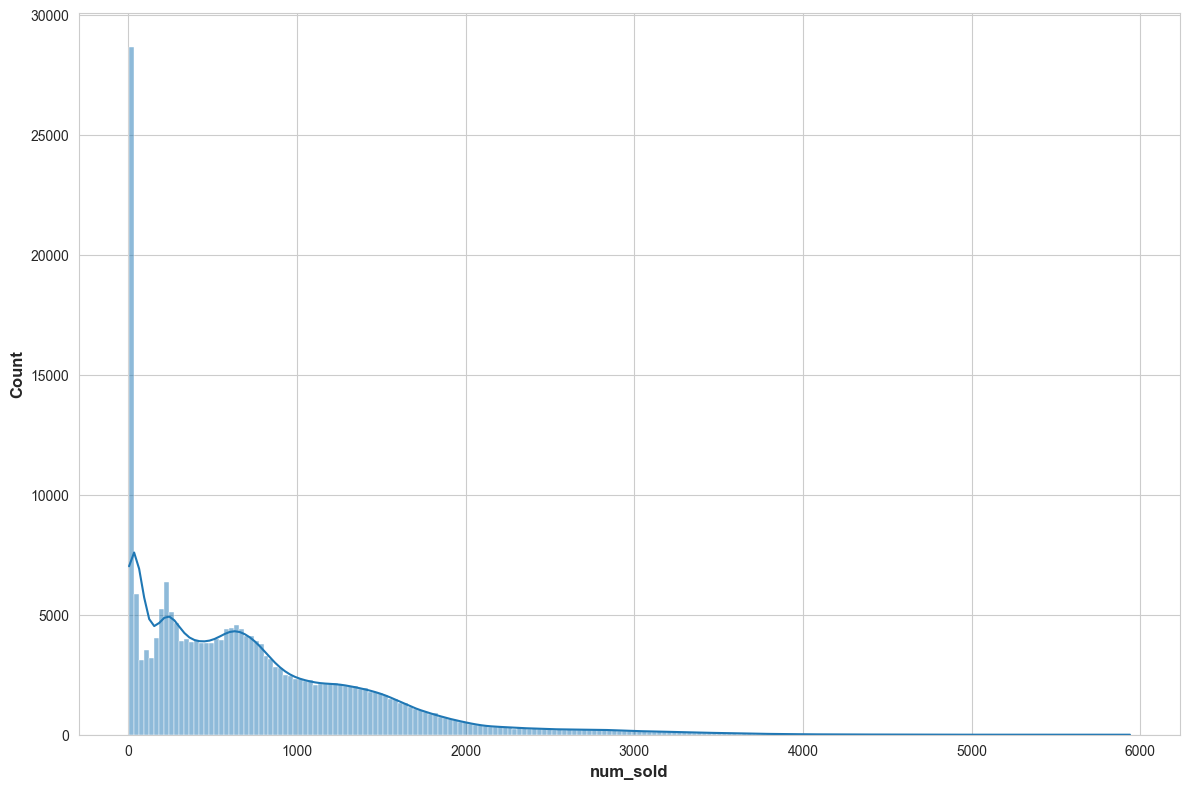

In [16]:
plt.figure(figsize=(12,8))
sns.histplot(train_df["num_sold"], kde=True)
plt.show()

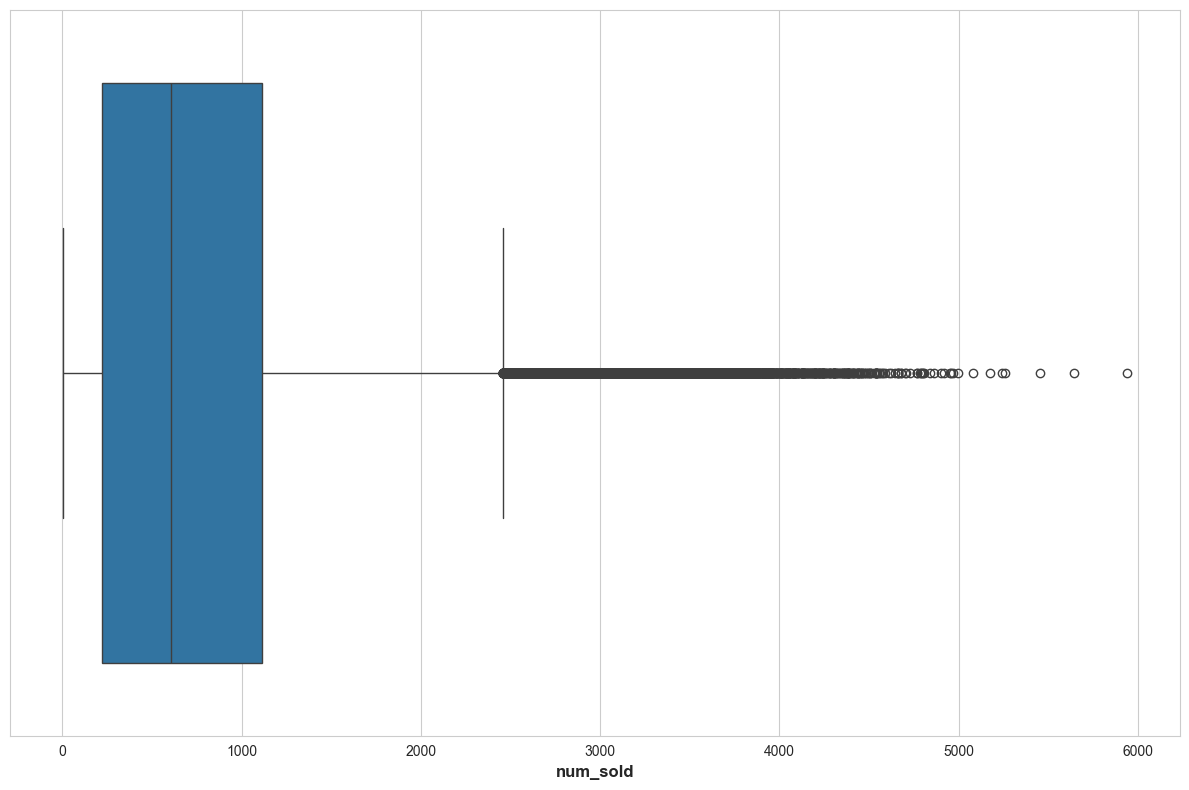

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x=train_df["num_sold"])
plt.show()

Understanding Box Plot  
https://www.geeksforgeeks.org/box-plot/  

In [19]:
train_df["country"].value_counts() 
# Number of rows with each country

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

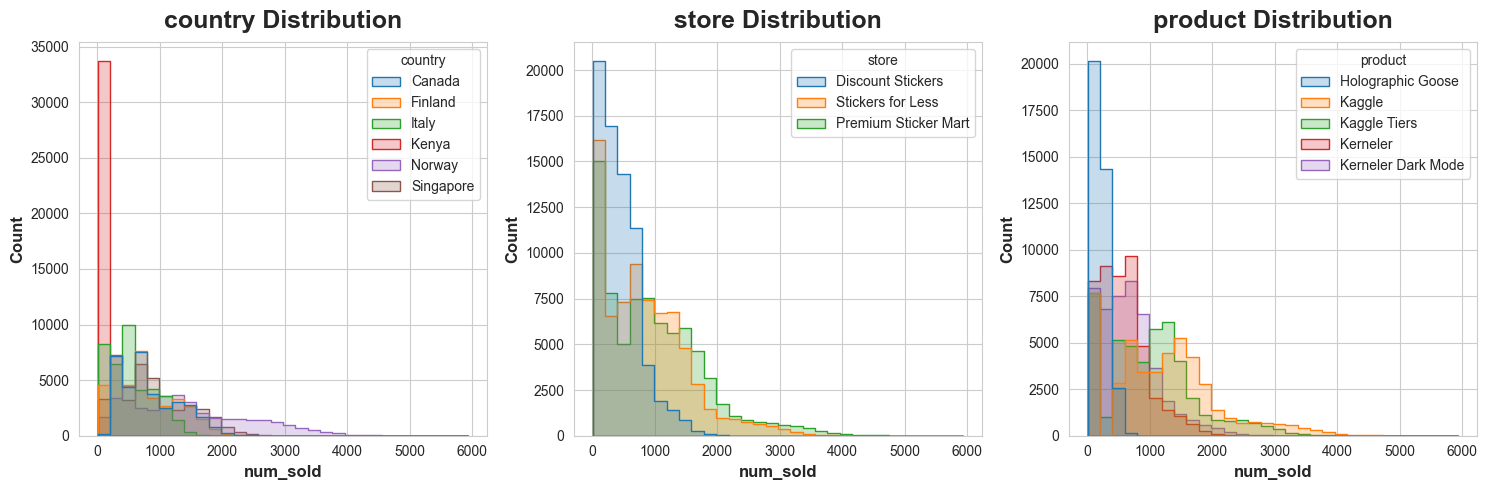

In [20]:
categorical_columns = ['country','store','product']
plt.figure(figsize=(15, 5))

for i,column in enumerate(categorical_columns, 1): # index starts at 1
    plt.subplot(1,3,i)
    sns.histplot(data = train_df, x = "num_sold", hue =column , element ='step', bins=30) # hue -> categories in each column, step for transparent bars
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

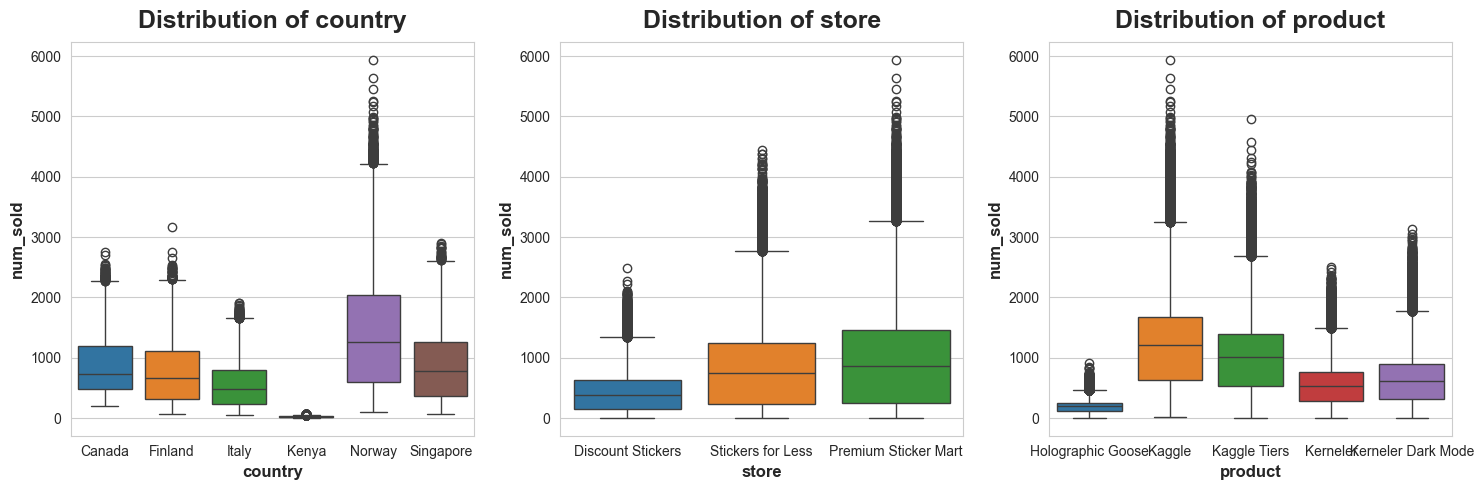

In [21]:
plt.figure(figsize=(15,5))
for i,column in enumerate(categorical_columns, 1):
    plt.subplot(1,3,i)
    sns.boxplot(y = train_df["num_sold"], x =train_df[column] ,hue =train_df[column])
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Norway, Premium Sticker Mart, Kaggle, Kaggle Tiers are bringing majority sales.  
Majority outliers also present in them.

In [22]:
train_df.groupby('country')['num_sold'].mean()

country
Canada        840.045003
Finland       748.243306
Italy         542.241403
Kenya          20.431100
Norway       1422.560422
Singapore     863.052379
Name: num_sold, dtype: float64

See above Norway mean proves it.

In [23]:
train_df.groupby('store')['num_sold'].mean()

store
Discount Stickers       427.775887
Premium Sticker Mart    973.836240
Stickers for Less       840.046418
Name: num_sold, dtype: float64

In [24]:
train_df.groupby('product')['num_sold'].mean()

product
Holographic Goose      197.484363
Kaggle                1232.384587
Kaggle Tiers          1018.344110
Kerneler               556.913102
Kerneler Dark Mode     651.042021
Name: num_sold, dtype: float64

Handling Missing Values